In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

if not '..' in sys.path:
    sys.path.append('..')

In [3]:
def read_ascii_dtm_data(path):
    x = []
    y = []
    val = []
    num = []
    sdv = []

    with open(path, 'r') as file:
        file_content = file.read().splitlines()

        for line in file_content[1:]:
            line_content = line.split(',')
            try:
                float(line_content[0])
                float(line_content[1])
                float(line_content[2])
                float(line_content[3])
                float(line_content[4])
            except:
                pass
            else:
                x.append(float(line_content[0]))
                y.append(float(line_content[1]))
                val.append(float(line_content[2]))
                num.append(float(line_content[3]))
                sdv.append(float(line_content[4]))

    return x, y, val, num, sdv

path_before = r'C:\PDS Projects\ABP53_UTM34N_stg3\Product\abp53seb03_id006_Calibr_Po_50cm_oldCalib.asc'
path_after = r'C:\PDS Projects\ABP53_UTM34N_stg3\Product\abp53seb03_id006_Calibr_Po_50cm_newCalib.asc'

x_b, y_b, val_b, num_b, sdv_b = read_ascii_dtm_data(path_before)
x_a, y_a, val_a, num_a, sdv_a = read_ascii_dtm_data(path_after)


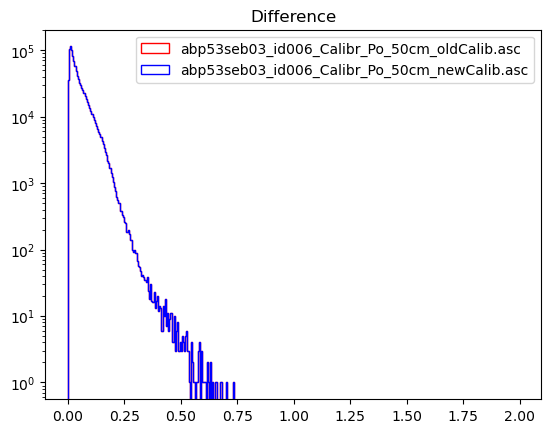

In [6]:
n_bins = np.arange(0,2,0.005)
dist1 = np.array(sdv_b) 
dist2 = np.array(sdv_a)
# We can set the number of bins with the *bins* keyword argument.
fig, ax = plt.subplots()
ax.set_title('Difference')
# We can set the number of bins with the *bins* keyword argument.

grid_before = os.path.basename(path_before)
grid_after = os.path.basename(path_after)

# Before:
ax.hist(dist1, bins=n_bins, histtype='step', color='r', label=grid_before, log=True)

# After:
ax.hist(dist2, bins=n_bins, histtype='step', color='b', label=grid_after, log=True)
ax.axis()
plt.legend()
plt.show()